<a href="https://colab.research.google.com/github/abkerper/DS4002_Project2/blob/main/Draft1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/abkerper/DS4002_Project2

Cloning into 'DS4002_Project2'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 44 (delta 12), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (44/44), 4.70 MiB | 8.87 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [48]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.0 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import datetime
from pandas import read_csv
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

In [85]:
df_type = pd.read_csv('/content/DS4002_Project2/SA_0000001400.csv')
df_sex = pd.read_csv('/content/DS4002_Project2/SA_0000001688.csv')

In [86]:
df_type = df_type[['Id','IndicatorCode', 'SpatialDimension','SpatialDimensionValueCode',
                     'DisaggregatingDimension1', 'DisaggregatingDimension1ValueCode',
                     'NumericValue','TimeDimensionValue']]

In [87]:
df_type = df_type[df_type['SpatialDimension']=='COUNTRY']

In [88]:
df_total = df_type[(df_type['DisaggregatingDimension1ValueCode']=='ALCOHOLTYPE_SA_TOTAL')]

In [89]:
df_total = df_total[['SpatialDimensionValueCode','NumericValue','TimeDimensionValue']]

In [90]:
countries = ['AUT','BEL','BGR','HRV','CYP','CZE','DNK','EST','FIN','FRA','DEU','GRC','HUN','IRL','ITA',
             'LVA','LTU','LUX','MLT','NLD','POL','PRT','ROU','SVK','SVN','ESP','SWE','GBR','USA','JPN']

df_total = df_total[df_total['SpatialDimensionValueCode'].isin(countries)]

In [91]:
df_pivot = df_total.pivot(index='TimeDimensionValue', columns='SpatialDimensionValueCode', values='NumericValue')

df_pivot.reset_index(inplace=True)

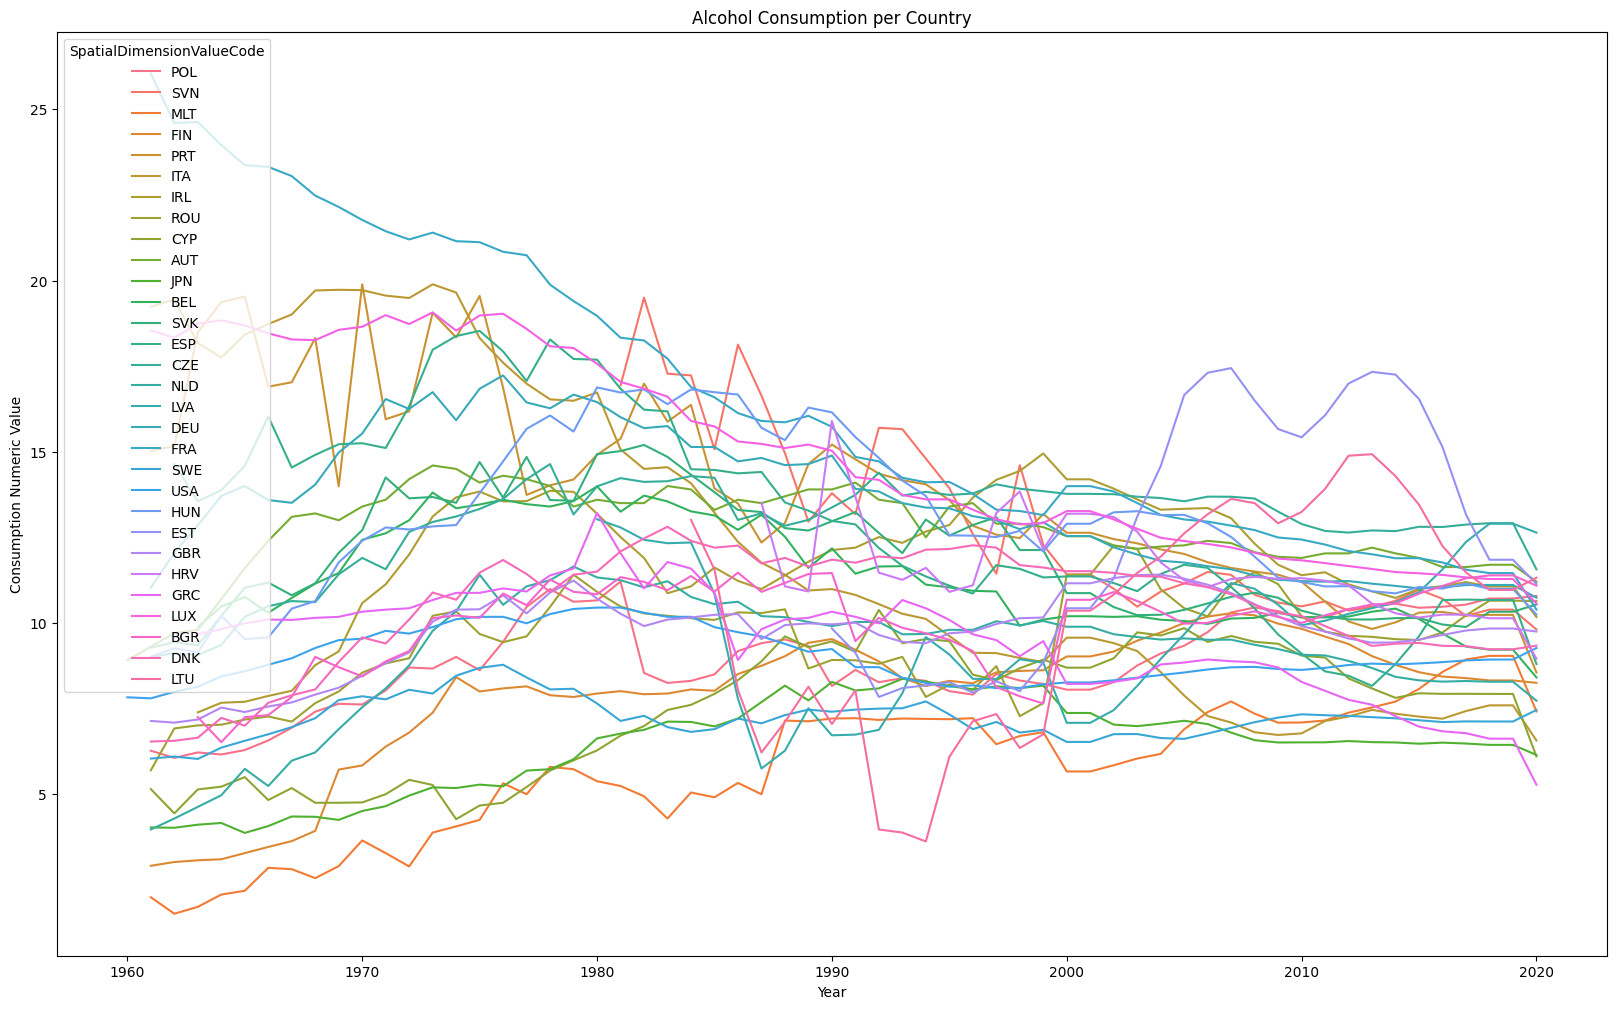

In [92]:
plt.figure(figsize=(20, 12))

sns.lineplot(data=df_total, x = 'TimeDimensionValue', y = 'NumericValue', hue = 'SpatialDimensionValueCode')

plt.title('Alcohol Consumption per Country')
plt.xlabel('Year')
plt.ylabel('Consumption Numeric Value')

plt.show()

In [93]:
USA = df_pivot[['TimeDimensionValue','USA']]
JPN = df_pivot[['TimeDimensionValue','JPN']]
GBR = df_pivot[['TimeDimensionValue','GBR']]
DEU = df_pivot[['TimeDimensionValue','DEU']]

In [94]:
USA.rename(columns={'USA': 'ConsumptionValue'}, inplace=True)
USA.set_index('TimeDimensionValue', inplace=True)
USA = USA.reset_index(drop=False) # Keep the 'TimeDimensionValue' column
USA.index = pd.to_datetime(USA['TimeDimensionValue'], format='%Y')
USA = USA.drop(columns=['TimeDimensionValue'])

In [95]:
JPN.rename(columns={'JPN': 'ConsumptionValue'}, inplace=True)
JPN.set_index('TimeDimensionValue', inplace=True)
JPN = JPN.reset_index(drop=False) # Keep the 'TimeDimensionValue' column
JPN.index = pd.to_datetime(JPN['TimeDimensionValue'], format='%Y')
JPN = JPN.drop(columns=['TimeDimensionValue'])

In [96]:
GBR.rename(columns={'GBR': 'ConsumptionValue'}, inplace=True)
GBR.set_index('TimeDimensionValue', inplace=True)
GBR = GBR.reset_index(drop=False) # Keep the 'TimeDimensionValue' column
GBR.index = pd.to_datetime(GBR['TimeDimensionValue'], format='%Y')
GBR = GBR.drop(columns=['TimeDimensionValue'])

In [97]:
DEU.rename(columns={'DEU': 'ConsumptionValue'}, inplace=True)
DEU.set_index('TimeDimensionValue', inplace=True)
DEU = DEU.reset_index(drop=False) # Keep the 'TimeDimensionValue' column
DEU.index = pd.to_datetime(DEU['TimeDimensionValue'], format='%Y')
DEU = DEU.drop(columns=['TimeDimensionValue'])

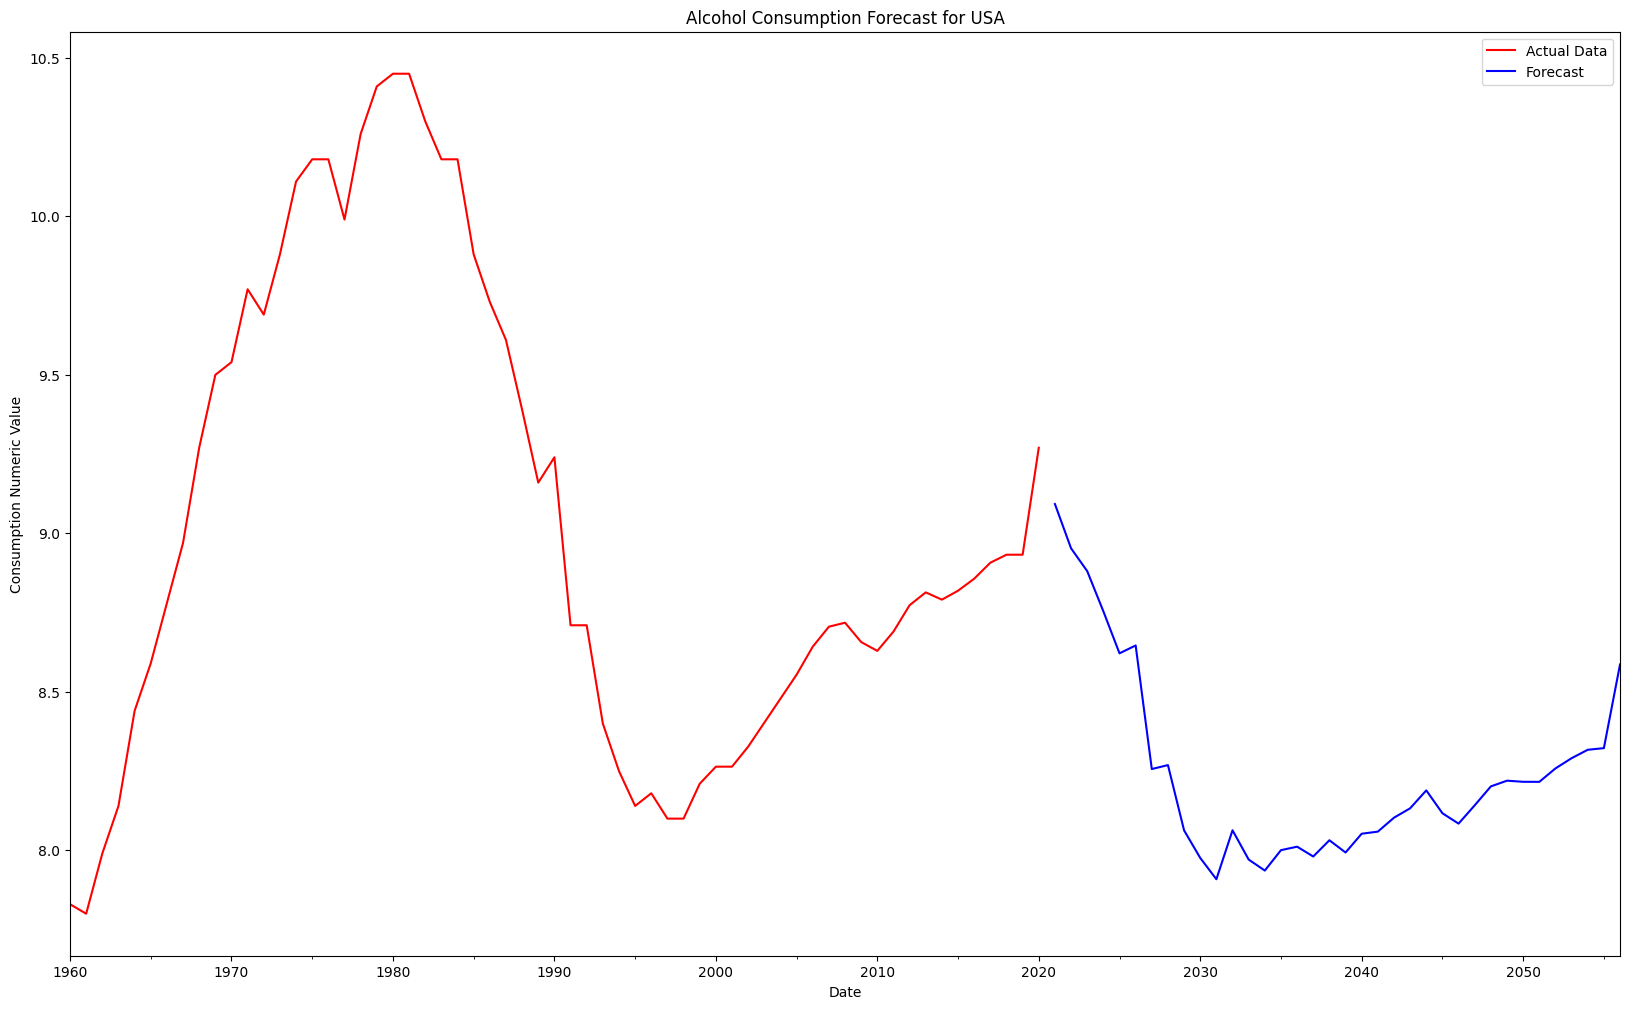

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMAX model
model = SARIMAX(US['ConsumptionValue'],
                order=(0, 1, 1),
                seasonal_order=(2, 1, 1, 12))
result = model.fit()

# Forecast for the next 3 years
forecast = result.predict(start=len(US),
                          end=(len(US)-1) + 3 * 12,
                          typ='levels').rename('Forecast')

# Plot the original data and the forecast with custom colors
plt.figure(figsize=(20, 12))  # Set the figure size

# Plot the original data in blue
US['ConsumptionValue'].plot(legend=True, color='red', label='Actual Data')

# Plot the forecast in red
forecast.plot(legend=True, color='blue', label='Forecast')

# Add title and labels
plt.title('Alcohol Consumption Forecast for USA') # Adjust format as needed\
plt.xlabel('Date')
plt.ylabel('Consumption Numeric Value')

# Show the plot
plt.show()


In 2008, the actual value was 8.71812, forecasted was 8.71534, spike: 0.00278


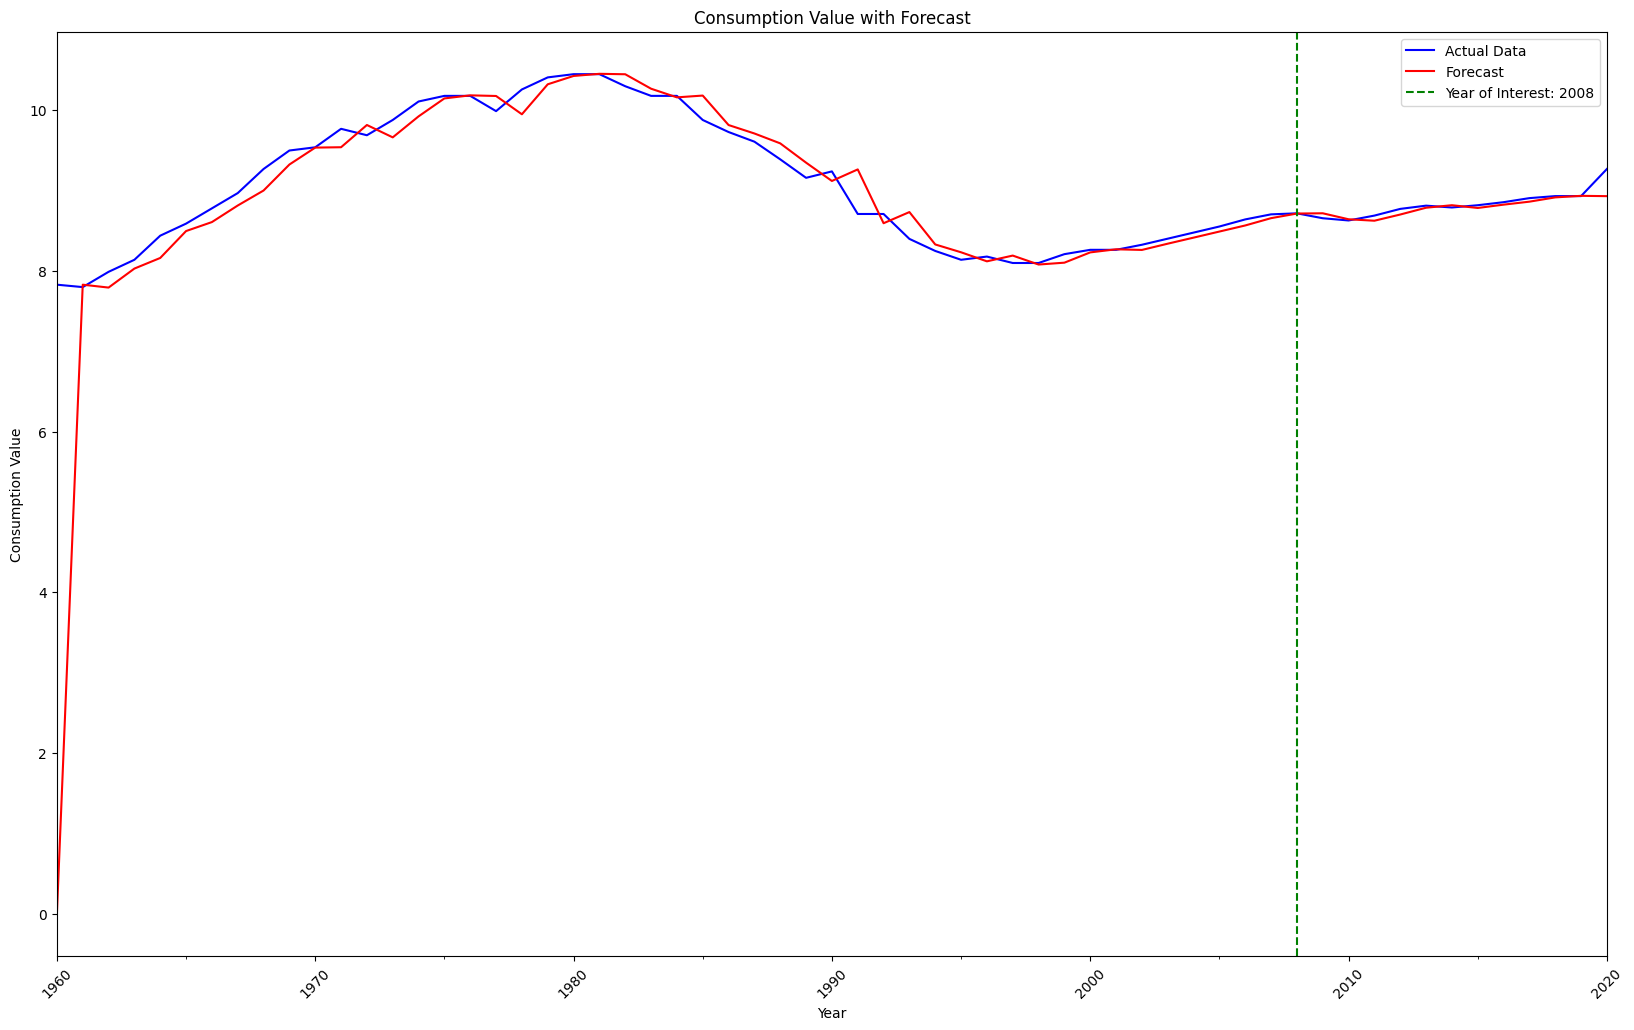

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

model = SARIMAX(USA['ConsumptionValue'], order=(0, 1, 1), seasonal_order=(0, 0, 0, 0))  # Adjust orders as needed
result = model.fit()

# Step 3: Generate predictions for the entire series
USA['Forecast'] = result.predict(start=USA.index[0], end=USA.index[-1])

# Step 4: Calculate spikes for specific years
# For example, you want to analyze spikes in 2016 and 2020
years_of_interest = [2008]
for year in years_of_interest:
    actual_value = USA.loc[pd.to_datetime(str(year))]['ConsumptionValue']
    forecasted_value = USA.loc[pd.to_datetime(str(year))]['Forecast']
    spike = actual_value - forecasted_value
    if spike > 0:
        print(f"In {year}, the actual value was {actual_value:.5f}, forecasted was {forecasted_value:.5f}, spike: {spike:.5f}")
    else:
        print(f"In {year}, no spike detected.")

# Step 5: Plotting the actual vs forecast
plt.figure(figsize=(20, 12))
USA['ConsumptionValue'].plot(legend=True, color='blue', label='Actual Data')
USA['Forecast'].plot(legend=True, color='red', label='Forecast')

plt.title('Consumption Value with Forecast')
plt.xlabel('Year')
plt.ylabel('Consumption Value')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.axvline(pd.to_datetime("2008"), color='green', linestyle='--', label='Year of Interest: 2008')
plt.legend()
plt.show()

In 2008, no spike detected.


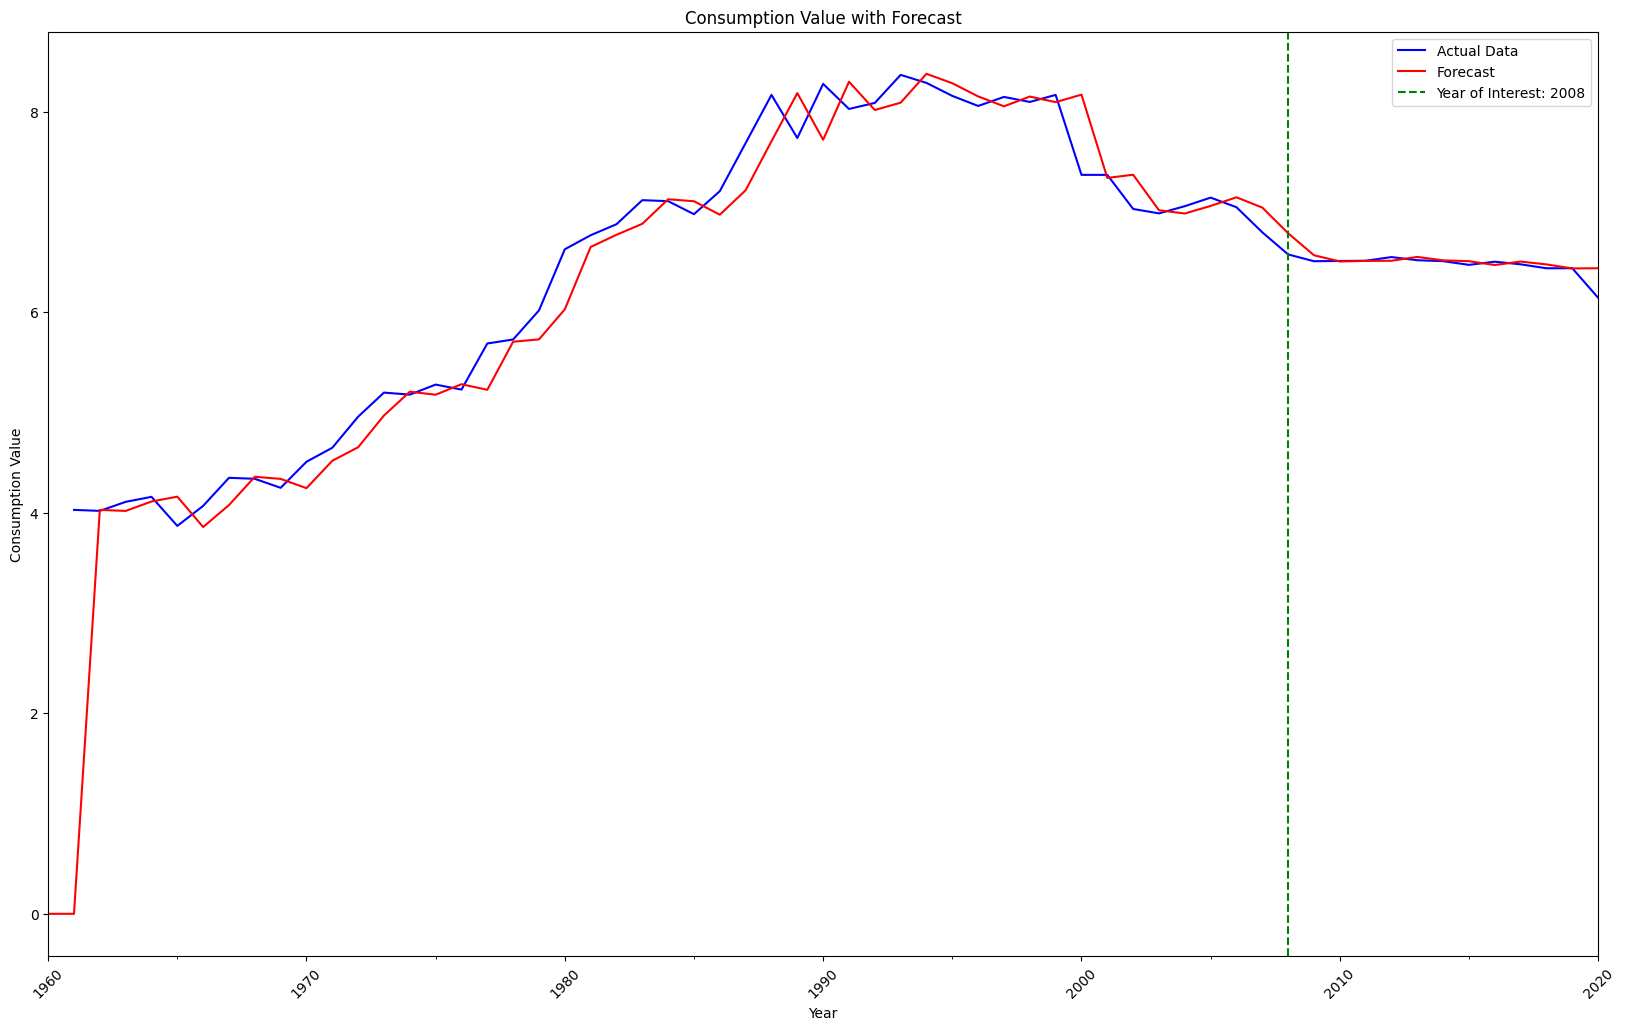

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

model = SARIMAX(JPN['ConsumptionValue'], order=(0, 1, 1), seasonal_order=(0, 0, 0, 0))  # Adjust orders as needed
result = model.fit()

# Step 3: Generate predictions for the entire series
JPN['Forecast'] = result.predict(start=JPN.index[0], end=JPN.index[-1])

# Step 4: Calculate spikes for specific years
# For example, you want to analyze spikes in 2016 and 2020
years_of_interest = [2008]
for year in years_of_interest:
    actual_value = JPN.loc[pd.to_datetime(str(year))]['ConsumptionValue']
    forecasted_value = JPN.loc[pd.to_datetime(str(year))]['Forecast']
    spike = actual_value - forecasted_value
    if spike > 0:
        print(f"In {year}, the actual value was {actual_value:.5f}, forecasted was {forecasted_value:.5f}, spike: {spike:.5f}")
    else:
        print(f"In {year}, no spike detected.")

# Step 5: Plotting the actual vs forecast
plt.figure(figsize=(20, 12))
JPN['ConsumptionValue'].plot(legend=True, color='blue', label='Actual Data')
JPN['Forecast'].plot(legend=True, color='red', label='Forecast')

plt.title('Consumption Value with Forecast')
plt.xlabel('Year')
plt.ylabel('Consumption Value')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.axvline(pd.to_datetime("2008"), color='green', linestyle='--', label='Year of Interest: 2008')
plt.legend()
plt.show()

In 2008, no spike detected.


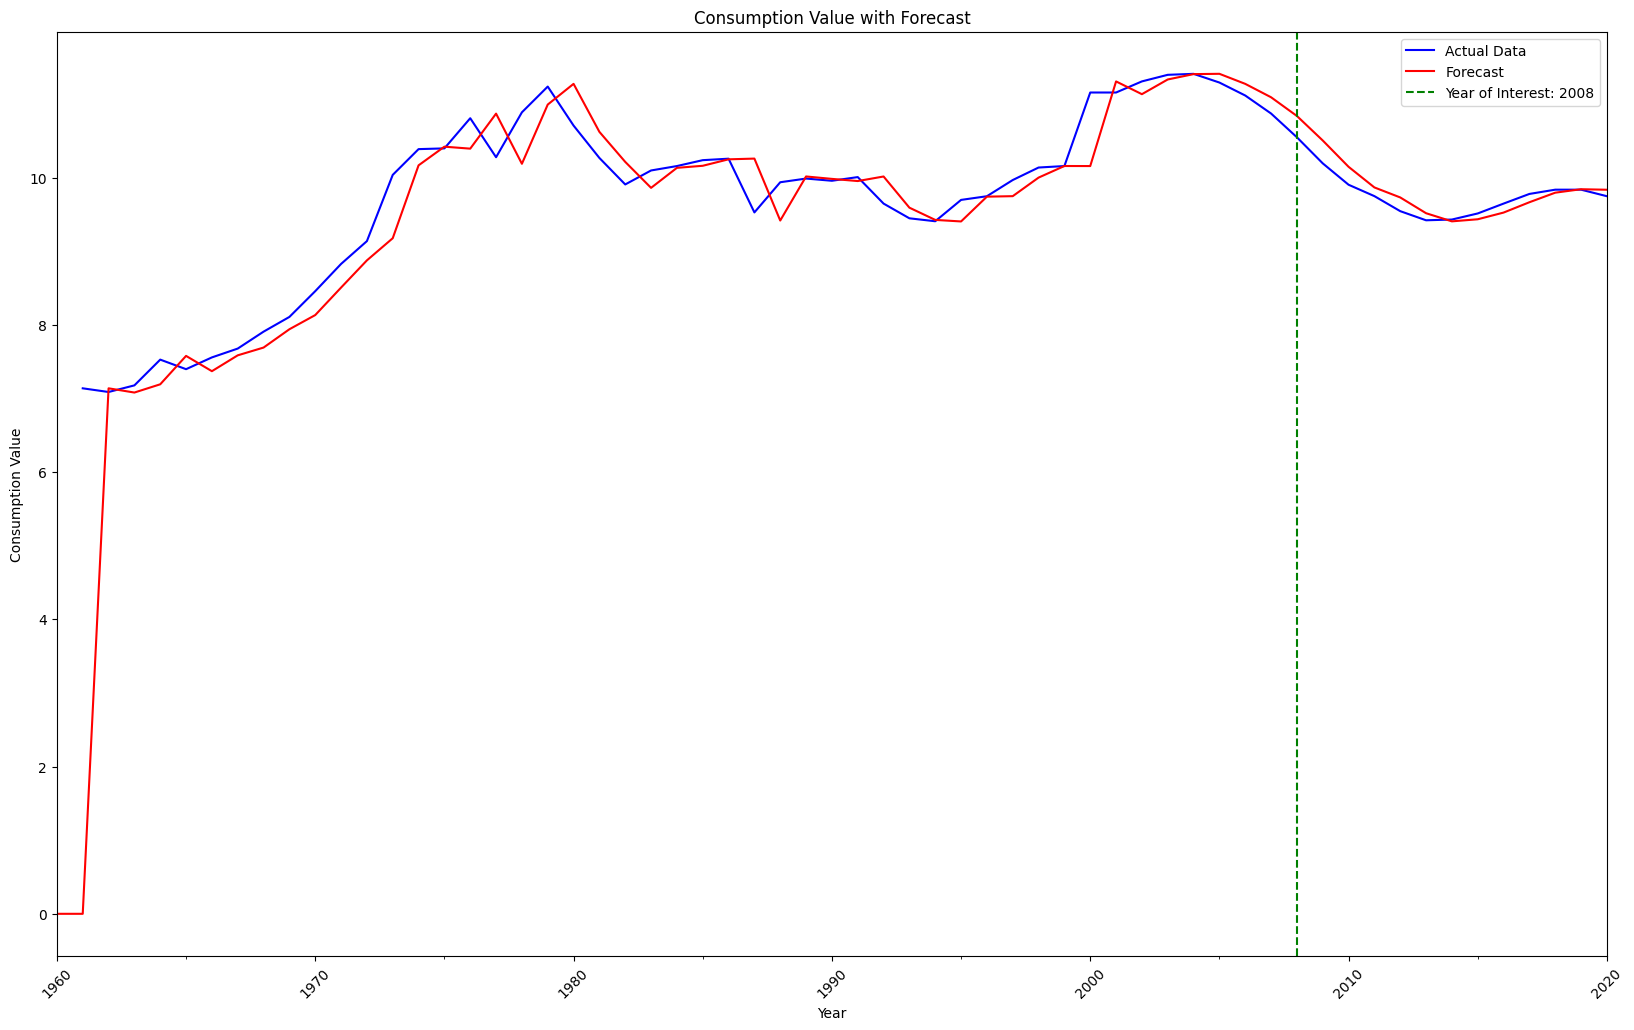

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

model = SARIMAX(GBR['ConsumptionValue'], order=(0, 1, 1), seasonal_order=(0, 0, 0, 0))  # Adjust orders as needed
result = model.fit()

# Step 3: Generate predictions for the entire series
GBR['Forecast'] = result.predict(start=GBR.index[0], end=GBR.index[-1])

# Step 4: Calculate spikes for specific years
# For example, you want to analyze spikes in 2016 and 2020
years_of_interest = [2008]
for year in years_of_interest:
    actual_value = GBR.loc[pd.to_datetime(str(year))]['ConsumptionValue']
    forecasted_value = GBR.loc[pd.to_datetime(str(year))]['Forecast']
    spike = actual_value - forecasted_value
    if spike > 0:
        print(f"In {year}, the actual value was {actual_value:.5f}, forecasted was {forecasted_value:.5f}, spike: {spike:.5f}")
    else:
        print(f"In {year}, no spike detected.")

# Step 5: Plotting the actual vs forecast
plt.figure(figsize=(20, 12))
GBR['ConsumptionValue'].plot(legend=True, color='blue', label='Actual Data')
GBR['Forecast'].plot(legend=True, color='red', label='Forecast')

plt.title('Consumption Value with Forecast')
plt.xlabel('Year')
plt.ylabel('Consumption Value')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.axvline(pd.to_datetime("2008"), color='green', linestyle='--', label='Year of Interest: 2008')
plt.legend()
plt.show()

In 2008, no spike detected.


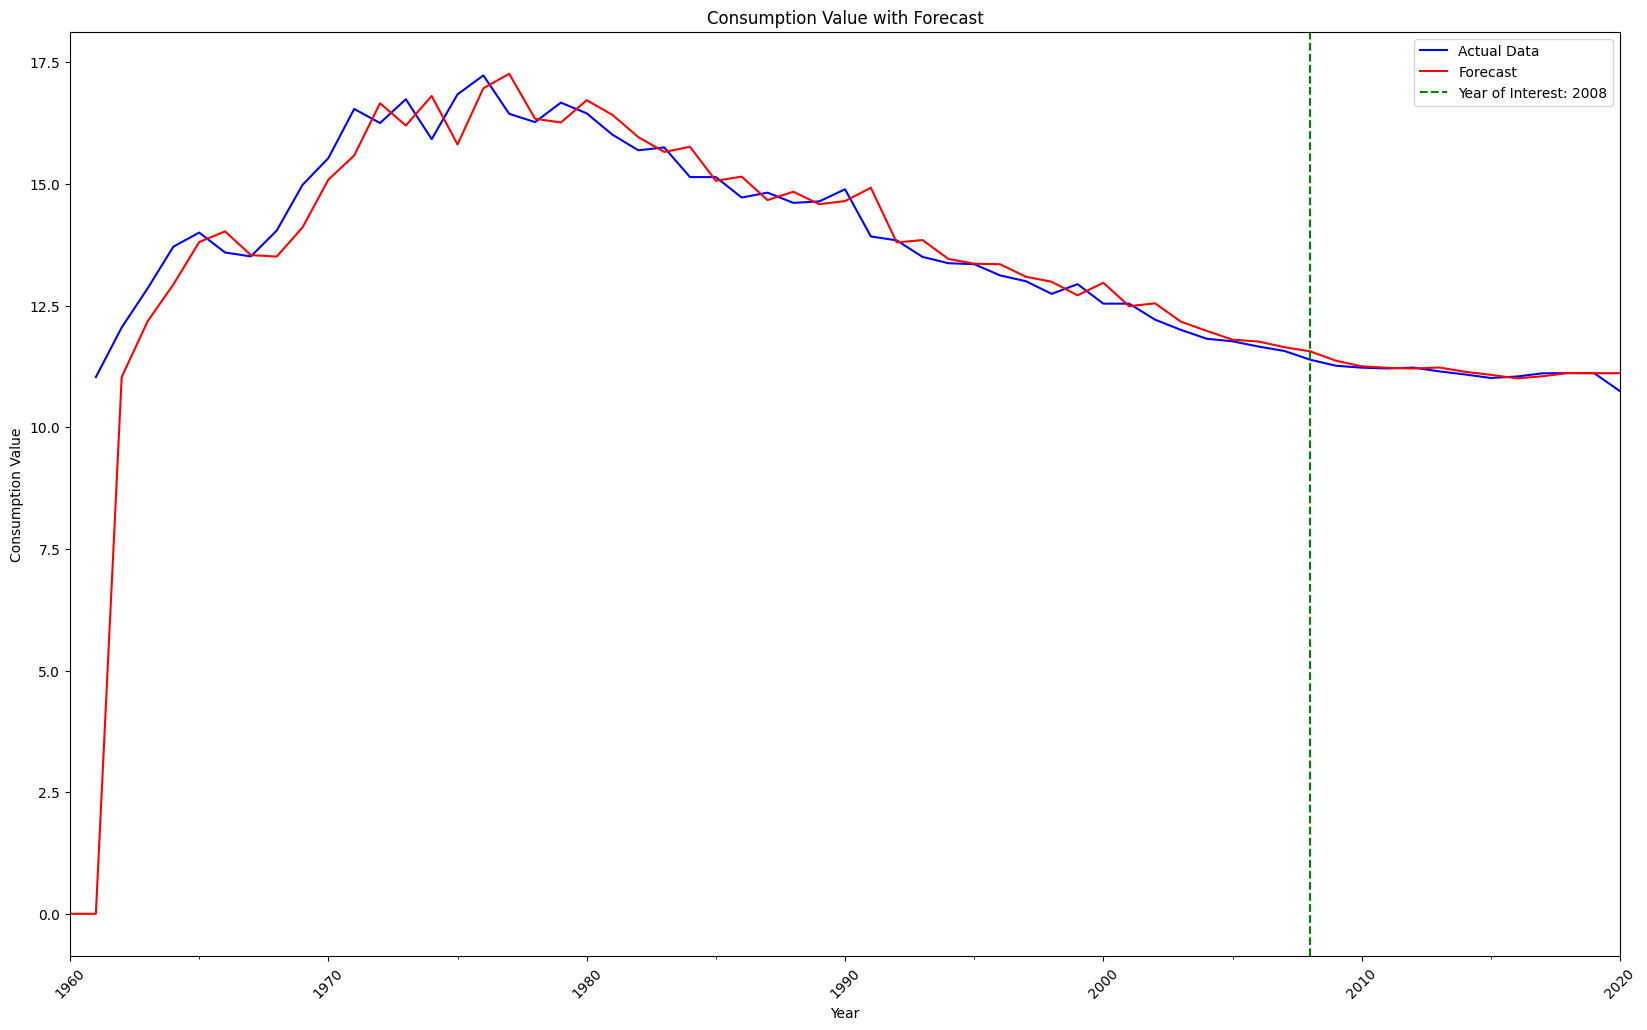

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

model = SARIMAX(DEU['ConsumptionValue'], order=(0, 1, 1), seasonal_order=(0, 0, 0, 0))  # Adjust orders as needed
result = model.fit()

# Step 3: Generate predictions for the entire series
DEU['Forecast'] = result.predict(start=DEU.index[0], end=DEU.index[-1])

# Step 4: Calculate spikes for specific years
# For example, you want to analyze spikes in 2016 and 2020
years_of_interest = [2008]
for year in years_of_interest:
    actual_value = DEU.loc[pd.to_datetime(str(year))]['ConsumptionValue']
    forecasted_value = DEU.loc[pd.to_datetime(str(year))]['Forecast']
    spike = actual_value - forecasted_value
    if spike > 0:
        print(f"In {year}, the actual value was {actual_value:.5f}, forecasted was {forecasted_value:.5f}, spike: {spike:.5f}")
    else:
        print(f"In {year}, no spike detected.")

# Step 5: Plotting the actual vs forecast
plt.figure(figsize=(20, 12))
DEU['ConsumptionValue'].plot(legend=True, color='blue', label='Actual Data')
DEU['Forecast'].plot(legend=True, color='red', label='Forecast')

plt.title('Consumption Value with Forecast')
plt.xlabel('Year')
plt.ylabel('Consumption Value')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.axvline(pd.to_datetime("2008"), color='green', linestyle='--', label='Year of Interest: 2008')
plt.legend()
plt.show()

In [105]:
df_sex = df_sex[['Id','IndicatorCode', 'SpatialDimension','SpatialDimensionValueCode',
                     'DisaggregatingDimension1', 'DisaggregatingDimension1ValueCode',
                     'NumericValue','TimeDimensionValue']]

df_sex_total = df_sex[df_sex['SpatialDimension']=='COUNTRY']

df_sex_total = df_sex_total[(df_type['DisaggregatingDimension1ValueCode']=='SEX_MLE') |
                            (df_type['DisaggregatingDimension1ValueCode']=='SEX_FMLE')]

df_sex_total = df_sex_total[['SpatialDimensionValueCode','NumericValue','TimeDimensionValue']]

df_pivot2 = df_sex_total.pivot(index='TimeDimensionValue', columns='SpatialDimensionValueCode', values='NumericValue')

df_pivot2.reset_index(inplace=True)